# NDFF Data Exploration

*Rob Knapen, Wageningen Environmental Research*
<br>

In this notebook species observation data from NDFF is explored. For more information about this data please contact NDFF or visit their website (be aware that it is not fully available in English).

**Data source(s)**:
- ['Nationale Databank Flora en Fauna'](https://ndff.nl) (October 2022). This data is copy protected.

### Setup
Note that some packages are already imported for future use.

In [1]:
import os

import matplotlib.pyplot as plt

# note that GeoPandas is switching from PyGEOS geometry backend to Shapely 2.0
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
import numpy as np
import geopandas as gp

import shapely

from geocube.api.core import make_geocube

### Load species observation data


In [2]:
# the NDFF datafile to process
#
# Available datasets:
# broedvogels_2016.csv      (observations of nesting birds in 2016)
# overigesoorten_2016.csv   (observations of 'other' species in 2016)
# planten_2016.csv          (observations of plants in 2016)
#
obs_filename = "../../../local/data/ndff/broedvogels_2016.csv"

# the columns to drop right away
always_drop_cols_from_source = None

# area of interest
aoi_epsg = 'EPSG:32631' # WGS 84 / UTM zone 31N
aoi_xmin =  674900.0
aoi_xmax =  729800.0
aoi_ymin = 5832230.0
aoi_ymax = 5853960.0

In [3]:
# load the data into a regular pandas dataframe
obs_df = pd.read_csv(obs_filename, header='infer', sep=';', on_bad_lines='warn')

# remove not needed columns
if always_drop_cols_from_source:
    obs_df.drop(columns=always_drop_cols_from_source, inplace=True)

# remove the crs prefix from the wkt data
obs_df['wkt_excl_crs'] = obs_df['wkt'].map(lambda x: x.split(';')[1], na_action='ignore')
obs_df.drop(columns=['wkt'], inplace=True)
obs_df.rename(columns={'wkt_excl_crs': 'wkt'}, inplace=True)

print(f'Total observations in dataset: {obs_df.count()}')
obs_df.head(5)

Total observations in dataset: nl_name           454452
sci_name          454452
jaar              454452
countsubject      454452
orig_abundance    454452
straal            454452
wkt               454452
dtype: int64


,nl_name,sci_name,jaar,countsubject,orig_abundance,straal,wkt
0,Krakeend,Anas strepera,2016,territorium,1,71,"POLYGON((247282 584478,247280.535533906 584474..."
1,Zwartkop,Sylvia atricapilla,2016,territorium,1,283,"POLYGON((65405.294923655 436165.134083641,6540..."
2,Zanglijster,Turdus philomelos,2016,territorium,1,283,"POLYGON((188642.918478918 344195.927912087,188..."
3,Zanglijster,Turdus philomelos,2016,territorium,1,283,"POLYGON((169116.484375 446596.0625,169113.5554..."
4,Spreeuw,Sturnus vulgaris,2016,nest,1,283,"POLYGON((127692 427328,127689.071067812 427320..."


In [4]:
obs_df.describe()

,jaar,straal
count,454452.0,454452.000000
mean,2016.0,221.808154
std,0.0,106.919241
min,2016.0,3.000000
25%,2016.0,71.000000
50%,2016.0,283.000000
75%,2016.0,283.000000
max,2016.0,488.000000


In [5]:
obs_df.isna().sum()

nl_name           0
sci_name          0
jaar              0
countsubject      0
orig_abundance    0
straal            0
wkt               0
dtype: int64

In [6]:
obs_df['nl_name'].value_counts()

nl_name
Zwartkop            22475
Winterkoning        18088
Tjiftjaf            16349
Grasmus             14712
Fitis               14189
                    ...  
Wespendief             78
Sijs                   77
Europese kanarie       53
Purperreiger           42
Raaf                   34
Name: count, Length: 129, dtype: int64

In [7]:
obs_df['countsubject'].value_counts()

countsubject
territorium                       326818
levend exemplaar                  115299
broedpaar                           5856
nest                                5277
vers gesleep nestmateriaal           896
onbekend                             181
pas gebruikt nest of eierschal       119
prenten                                1
copula                                 1
levend organisme                       1
kolonie                                1
vers dood gevonden                     1
braakballen                            1
Name: count, dtype: int64

In [8]:
obs_df['straal'].value_counts()

straal
283    339589
71      61410
3       51766
25        774
45        278
312       232
102       141
181        60
407        42
11         38
229        35
139        25
488        24
342        20
478         5
204         1
86          1
331         1
305         1
100         1
98          1
381         1
406         1
63          1
5           1
163         1
130         1
362         1
Name: count, dtype: int64

In [9]:
territory_df = obs_df[obs_df['countsubject'] == 'territorium'][['straal', 'orig_abundance']]
territory_df.value_counts()

straal  orig_abundance
283     1                 244029
3       1                  51599
71      1                  30106
283     2                    149
        3                    109
                           ...  
        33                     1
        348                    1
71      91                     1
283     37                     1
        111                    1
Name: count, Length: 153, dtype: int64

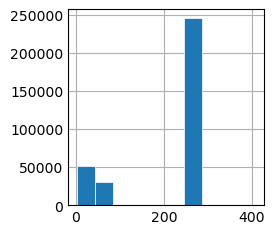

In [10]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()
ax.hist(x=territory_df['straal'], bins=10, linewidth=0.5, edgecolor='white')

plt.show()

In [55]:
living_df = obs_df[obs_df['countsubject'] == 'levend exemplaar'][['straal', 'orig_abundance']]
living_df.value_counts()

straal  orig_abundance
283     1                 112459
71      1                  54696
1       1                  22337
283     2                  20391
3       1                  16991
                           ...  
283     284                    1
        285                    1
        286                    1
71      58                     1
192     6                      1
Name: count, Length: 1470, dtype: int64

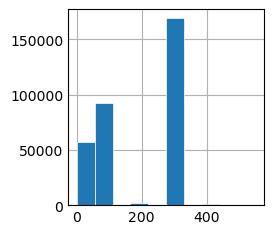

In [11]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()
ax.hist(x=living_df['straal'], bins=10, linewidth=0.5, edgecolor='white')

plt.show()